In [1]:
from simulator.bb84 import simulation_bb84
from tqdm import tqdm
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [12]:
# Create an empty list to store the dictionaries
results_list = []

for i in range(20):
    
    for qber in tqdm(arange(start=0.01, stop=0.16, step=0.01)):
        simulation_results = simulation_bb84(
            alice_basis_length=10000,
            disturbance_probability=qber,
            cascade_n_passes=4
        )
        
        # Append the results as a new dictionary to the list
        new_row = {
            'qber': qber,
            'final error rate': simulation_results.get('error rate'),
            'error estimate': simulation_results.get('error estimate'),
            'initial key length': simulation_results.get('key length history').get('qubits'),
            'key length after sifting': simulation_results.get('key length history').get('sifting'),
            'key length after err est': simulation_results.get('key length history').get('error estimation'),
            'key length after err corr': simulation_results.get('key length history').get('error correction')
        }
        results_list.append(new_row)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


In [13]:
results_df.sample(10)

,qber,final error rate,error estimate,initial key length,key length after sifting,key length after err est,key length after err corr
163,0.14,0.031873,0.096534,10000,5013,4018,1004
274,0.05,0.009407,0.032589,10000,5104,4122,1382
152,0.03,0.002825,0.013391,10000,5016,4039,2832
70,0.11,0.021472,0.062788,10000,4949,3914,978
225,0.01,0.002401,0.008138,10000,5031,4048,2916
87,0.13,0.027833,0.081660,10000,4994,4026,1006
226,0.02,0.002745,0.009978,10000,4954,3946,2550
194,0.15,0.024586,0.093390,10000,4962,3987,1993
78,0.04,0.004508,0.023939,10000,4951,3946,2662
113,0.09,0.010811,0.066046,10000,5011,3987,2035


Plotting results:

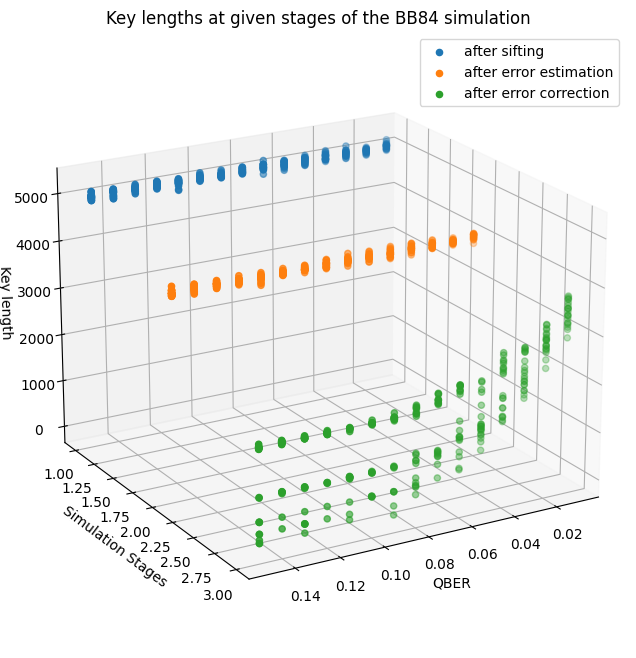

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for scatter plot
initial_params = results_df['qber']
stages = np.arange(1, 4)  # Assuming there are three stages in the simulation

# Scatter plot for Variable_1
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 1), 
    results_df['key length after sifting'], 
    label='after sifting'
)

# Scatter plot for Variable_2
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 2), 
    results_df['key length after err est'], 
    label='after error estimation'
)

# Scatter plot for Variable_3
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 3), 
    results_df['key length after err corr'], 
    label='after error correction'
)

# Set labels for axes
ax.set_xlabel('QBER')
ax.set_ylabel('Simulation Stages')
ax.set_zlabel('Key length')

# Set plot title
plt.title('Key lengths at given stages of the BB84 simulation')

# Set the viewing point
ax.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Show the legend
ax.legend()

# Show the plot
plt.show()

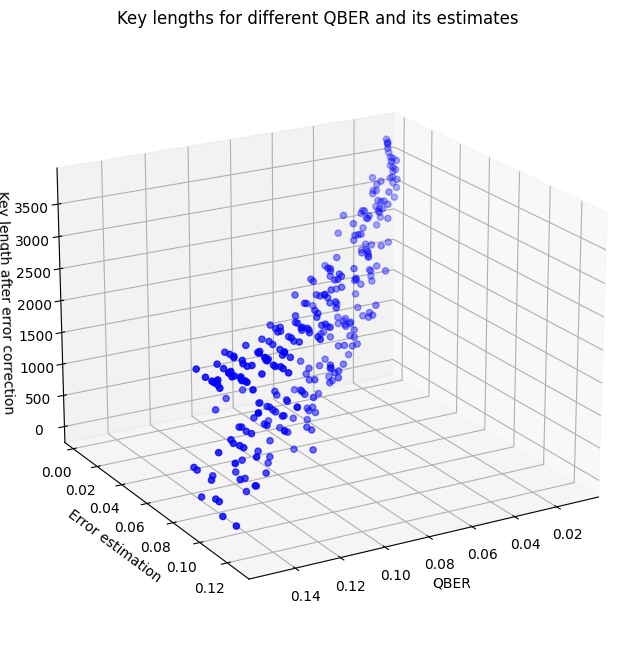

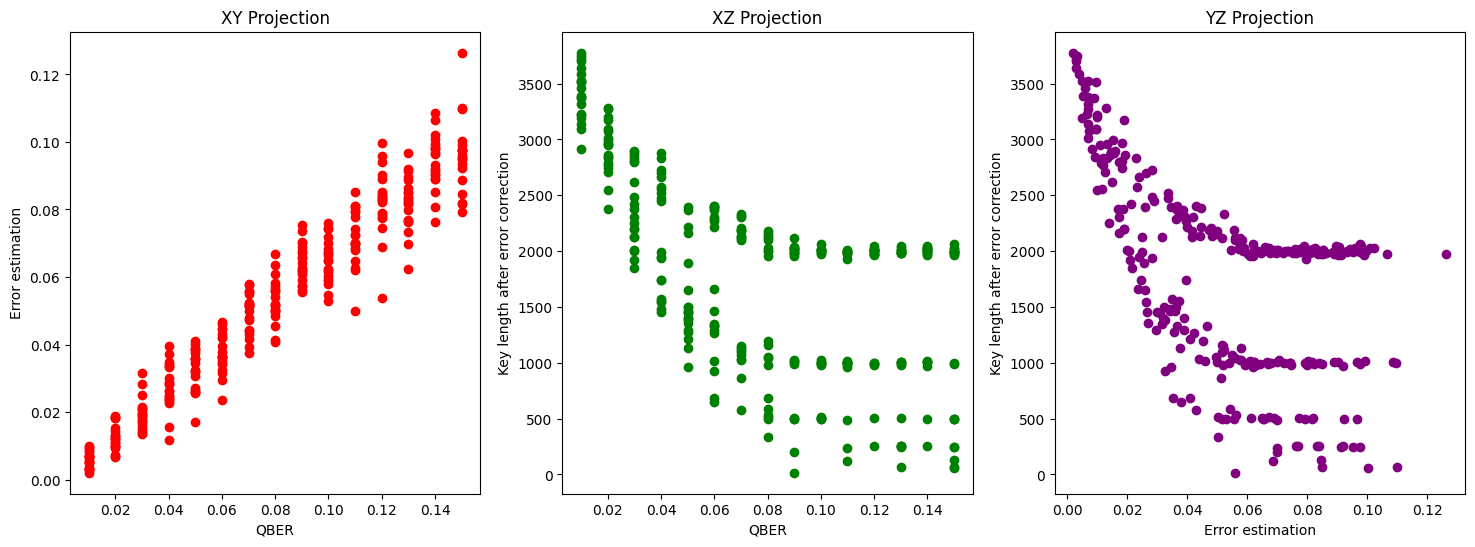

In [31]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax_3d = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax_3d.scatter(results_df['qber'], results_df['error estimate'], results_df['key length after err corr'], c='blue', label='3D scatter')

# Set labels for axes
ax_3d.set_xlabel('QBER')
ax_3d.set_ylabel('Error estimation')
ax_3d.set_zlabel('Key length after error correction')

# Set plot title
plt.title('Key lengths for different QBER and its estimates')

# Set the viewing point
ax_3d.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Plot projections on XY, XZ, and YZ planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY projection
axes[0].scatter(results_df['qber'], results_df['error estimate'], c='red', label='XY projection')
axes[0].set_xlabel('QBER')
axes[0].set_ylabel('Error estimation')
axes[0].set_title('XY Projection')

# XZ projection
axes[1].scatter(results_df['qber'], results_df['key length after err corr'], c='green', label='XZ projection')
axes[1].set_xlabel('QBER')
axes[1].set_ylabel('Key length after error correction')
axes[1].set_title('XZ Projection')

# YZ projection
axes[2].scatter(results_df['error estimate'], results_df['key length after err corr'], c='purple', label='YZ projection')
axes[2].set_xlabel('Error estimation')
axes[2].set_ylabel('Key length after error correction')
axes[2].set_title('YZ Projection')

# Show the plots
plt.show()

In [37]:
results_df.to_csv("new_results.csv")

That's a very interesting structure. Let's explore it, e.g., with trees:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

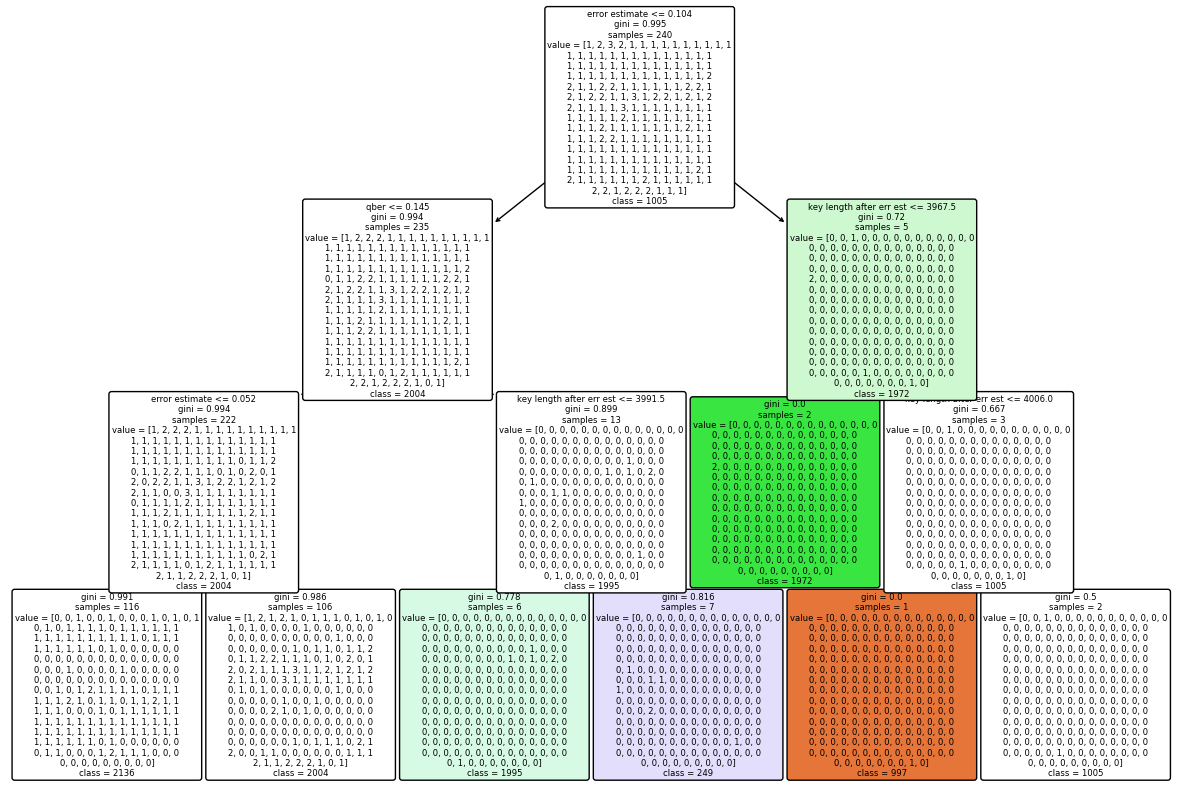

In [43]:
features = results_df[['qber', 'error estimate', 'key length after err est']]  # Add all your feature columns
target = results_df['key length after err corr']

# Convert numeric class labels to strings
target = target.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the decision tree model with max_depth
max_depth = 3  # You can adjust this value
model = DecisionTreeClassifier(max_depth=max_depth)

# Fit the model on the training data
model.fit(X_train, y_train)

# Plot the truncated decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features.columns, class_names=model.classes_.astype(str), filled=True, rounded=True)
plt.show()

Another graphic approach:

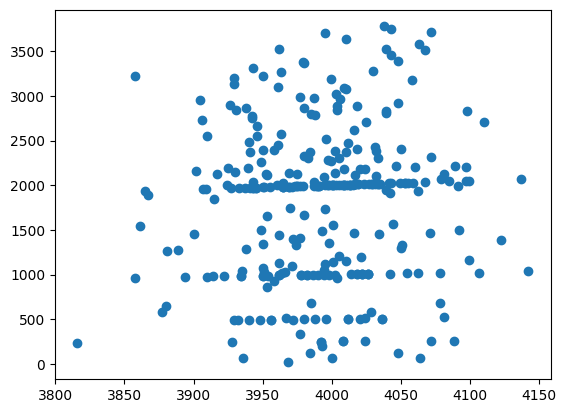

In [44]:
plt.scatter(results_df['key length after err est'], results_df['key length after err corr'])

Let's group the results per QBER for some greater clarity:

In [45]:
# Group by 'qber'
grouped_df = results_df.groupby('qber')

# Calculate quantiles, means, and standard deviations for each group
summary_df = grouped_df.agg({
    'final error rate': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'error estimate': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'initial key length': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'key length after sifting': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'key length after err est': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'key length after err corr': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
}).reset_index()

# Display the summary DataFrame
print(summary_df)

    qber final error rate                                 error estimate  \
                     mean       std <lambda_0> <lambda_1>           mean   
0   0.01         0.001733  0.001011   0.000924   0.002382       0.005951   
1   0.02         0.002835  0.001343   0.001757   0.003443       0.012414   
2   0.03         0.004715  0.001722   0.003838   0.005261       0.019408   
3   0.04         0.006246  0.002476   0.003921   0.008632       0.027569   
4   0.05         0.008035  0.003050   0.005409   0.009462       0.032621   
5   0.06         0.008163  0.002491   0.006684   0.009309       0.037686   
6   0.07         0.010942  0.003375   0.008758   0.013101       0.049384   
7   0.08         0.013112  0.003429   0.011417   0.015510       0.053008   
8   0.09         0.014393  0.006128   0.010699   0.019000       0.064199   
9   0.10         0.017357  0.005001   0.014034   0.020355       0.064760   
10  0.11         0.021142  0.005939   0.019169   0.022722       0.071951   
11  0.12    

KeyError: "['initial key length_mean' 'initial key length_std'\n 'initial key length_<lambda_0>' 'initial key length_<lambda_1>'] not in index"

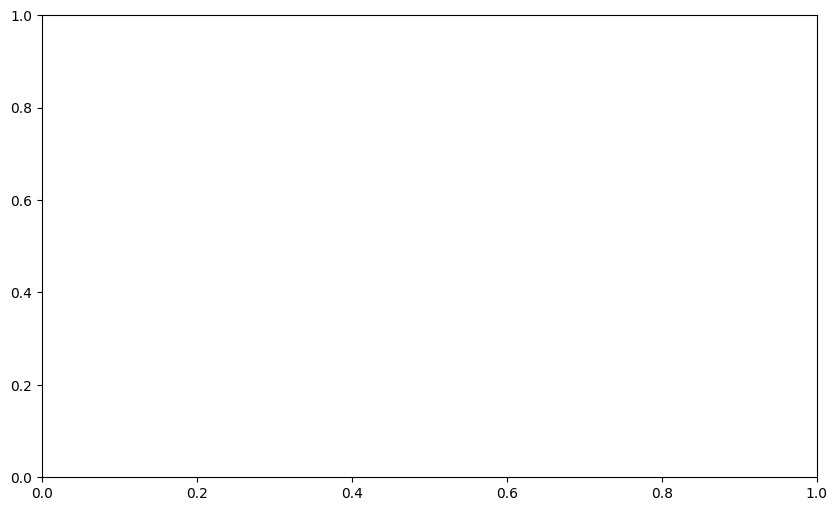

In [46]:
# Choose the QBER value of interest
selected_qber = 0.05

# Filter the DataFrame for the selected QBER value
selected_qber_df = summary_df[summary_df['qber'] == selected_qber]

# Extract relevant columns for plotting
key_length_columns = [
    'initial key length_mean',
    'initial key length_std',
    'initial key length_<lambda_0>',
    'initial key length_<lambda_1>'
]

# Plot boxplots for key lengths
fig3, ax = plt.subplots(figsize=(10, 6))
selected_qber_df[key_length_columns].boxplot(ax=ax)
ax.set_title(f'Boxplots of Key Lengths for QBER={selected_qber}')
ax.set_ylabel('Key Length')
ax.set_xlabel('Statistic')
plt.show()

When I was analysing where the extra indexes in Bob's blocks had come from:

In [3]:
for block_set in results_list[-1].get('cascade history'):
    alice_blocks = block_set.get('Alice blocks')
    bob_blocks = block_set.get('Bob blocks')
    for i in range(len(bob_blocks)):
        alice_keys = list(alice_blocks[i].keys())
        bob_keys = list(bob_blocks[i].keys())
        if '161' in bob_keys:
            print("\nNew instance of 161 key found.")
            print(alice_keys)
            print(bob_keys)


New instance of 161 key found.
['161', '46', '7', '132', '171', '92']
['161', '46', '7', '132', '171', '92']

New instance of 161 key found.
['84', '45', '75', '60', '152', '172', '161', '164', '148', '109', '86', '203']
['84', '45', '75', '60', '152', '172', '161', '164', '148', '109', '86', '203']

New instance of 161 key found.
['66', '146', '34', '15', '193', '11', '173', '170', '108', '44', '59', '148', '102', '107', '140', '178', '71', '50', '0', '134', '196', '190', '161', '131']
['66', '146', '34', '15', '193', '11', '173', '170', '108', '44', '59', '148', '102', '107', '140', '178', '71', '50', '0', '134', '196', '190', '161', '131']

New instance of 161 key found.
['154', '204', '42', '4', '188', '46', '48', '55', '50', '58', '63', '10', '113', '140', '20', '51', '111', '93', '44', '183', '75', '96', '161', '117', '26', '202', '163', '91', '53', '54', '116', '29', '103', '118', '166', '156', '170', '88', '43', '187', '79', '143', '160', '123', '39', '152', '150', '83']
['154

# Simulation with no error estimation, just as in the '93 paper

In [3]:
# Create an empty list to store the dictionaries
results93_list = []

for i in range(20):
    
    for qber in tqdm(arange(start=0.01, stop=0.16, step=0.01)):
        simulation_results = simulation_bb84(
            alice_basis_length=10000,
            disturbance_probability=qber,
            cascade_n_passes=4,
            error_estimation='none'
        )
        
        # Append the results as a new dictionary to the list
        new_row = {
            'qber': qber,
            'final error rate': simulation_results.get('error rate'),
            'error estimate': simulation_results.get('error estimate'),
            'initial key length': simulation_results.get('key length history').get('qubits'),
            'key length after sifting': simulation_results.get('key length history').get('sifting'),
            'key length after err est': simulation_results.get('key length history').get('error estimation'),
            'key length after err corr': simulation_results.get('key length history').get('error correction')
        }
        results93_list.append(new_row)

# Create a DataFrame from the list of dictionaries
results93_df = pd.DataFrame(results93_list)

100%|██████████| 15/15 [00:02<00:00,  5.80it/s]


In [4]:
results93_df.sample(10)

,qber,final error rate,error estimate,initial key length,key length after sifting,key length after err est,key length after err corr
42,0.13,0.036029,0.13,10000,4998,4998,1249
190,0.11,0.031339,0.11,10000,4915,4915,2457
290,0.06,0.015914,0.06,10000,4919,4919,2702
221,0.12,0.033136,0.12,10000,5071,5071,2535
94,0.05,0.008357,0.05,10000,5053,5053,1795
134,0.15,0.043956,0.15,10000,5100,5100,637
100,0.11,0.031506,0.11,10000,4889,4889,2444
284,0.15,0.040492,0.15,10000,5039,5039,2519
226,0.02,0.004673,0.02,10000,4984,4984,3852
272,0.03,0.007273,0.03,10000,5020,5020,2750


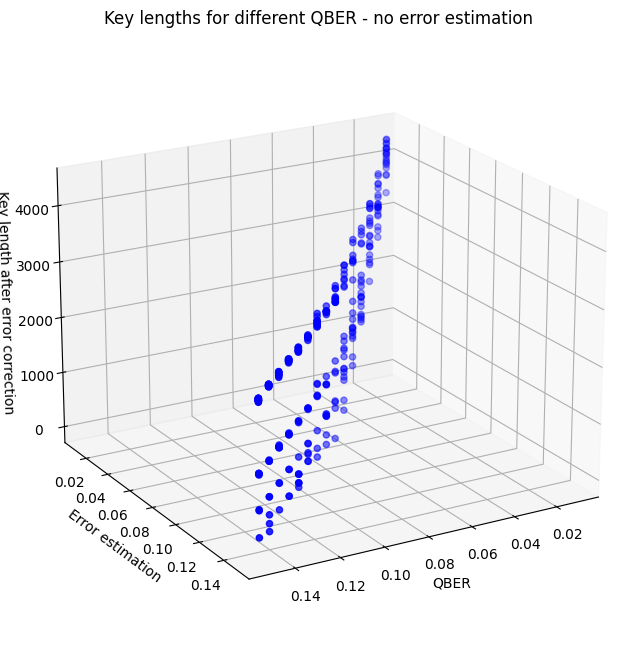

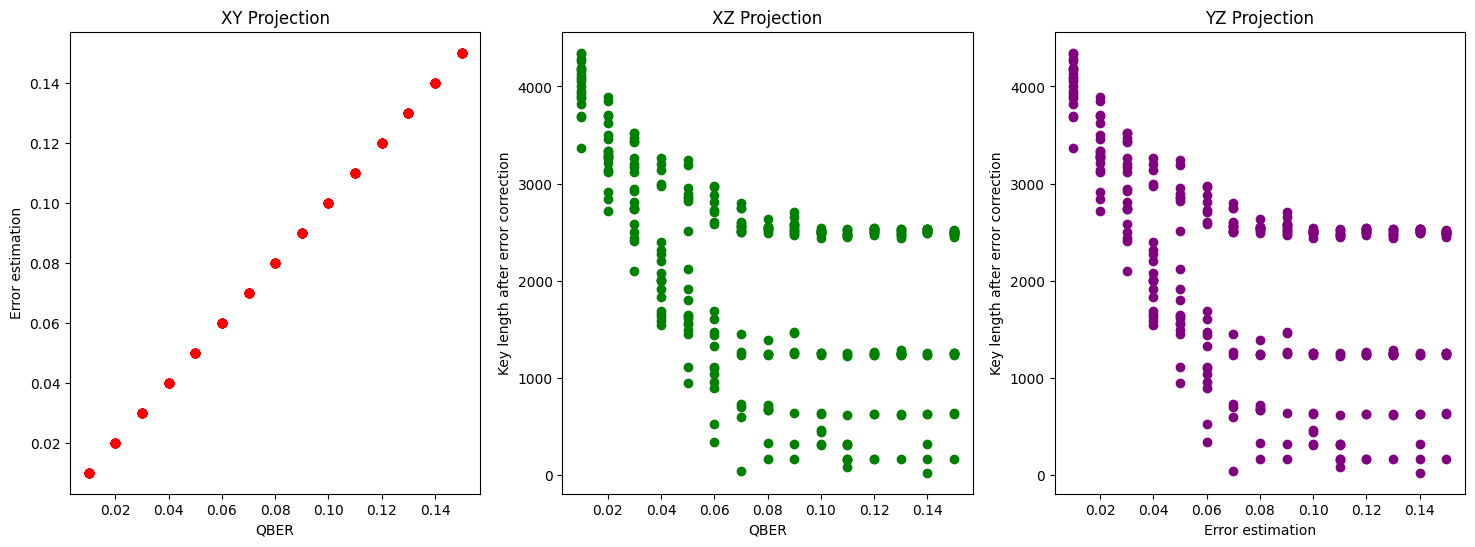

In [7]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax_3d = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax_3d.scatter(results93_df['qber'], results93_df['error estimate'], results93_df['key length after err corr'], c='blue', label='3D scatter')

# Set labels for axes
ax_3d.set_xlabel('QBER')
ax_3d.set_ylabel('Error estimation')
ax_3d.set_zlabel('Key length after error correction')

# Set plot title
plt.title('Key lengths for different QBER - no error estimation')

# Set the viewing point
ax_3d.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Plot projections on XY, XZ, and YZ planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY projection
axes[0].scatter(results93_df['qber'], results93_df['error estimate'], c='red', label='XY projection')
axes[0].set_xlabel('QBER')
axes[0].set_ylabel('Error estimation')
axes[0].set_title('XY Projection')

# XZ projection
axes[1].scatter(results93_df['qber'], results93_df['key length after err corr'], c='green', label='XZ projection')
axes[1].set_xlabel('QBER')
axes[1].set_ylabel('Key length after error correction')
axes[1].set_title('XZ Projection')

# YZ projection
axes[2].scatter(results93_df['error estimate'], results93_df['key length after err corr'], c='purple', label='YZ projection')
axes[2].set_xlabel('Error estimation')
axes[2].set_ylabel('Key length after error correction')
axes[2].set_title('YZ Projection')

# Show the plots
plt.show()